### 1 Каскад

In [1]:
import numpy as np

def Parallel(r1, r2):
    return r1 * r2 / (r1 + r2)

Up = 10
Ri = 7500
Rk1 = 15000
Rk2 = 1000
Rb = 330000
Re = 330
h21 = 100
Ut = 0.025


I2 = 0.005
Ie = (h21 + 1) * I2 * Re / Rb
re = Ut / Ie
k = Rk1 / re
h11 = (h21 + 1) * re
h11_Rb = Parallel(h11, Rb)
alpha = h11_Rb / (h11_Rb + Ri)
Ri_h11 = Parallel(Ri, h11)
betta = Ri_h11 / (Ri_h11 + Rb)
K_1 = alpha * np.abs(k) / (1 + betta * np.abs(k))
print("K_1 =", K_1)

In [3]:
import numpy as np


Ut = 0.025
Re = 510
L = 20 * 10**(-6)
C = 330 * 10**(-12)
Q = 75
w = 1 / (2 * np.pi * np.sqrt(L * C))
# Rk = complex(0, L / C * (1 / (w * C) - w * L))
Rk = np.sqrt(L / C) * Q
Ie = 0.00190514
betta = Re / Rk

print(Rk)

re = Ut / Ie
K = Rk / re
K_new = K / (1 + np.abs(K * betta))
print("K_1 =", K_new)


ro = np.sqrt(L / C)
Rek = ro * Q
Fr = 1 / (2 * np.pi * np.sqrt(L * C))
print("F0 =", Fr)
print("delta F =", Fr / Q)


18463.72364689991
K_1 = 35.2952269223347
F0 = 1959061.924191225
delta F = 26120.825655883


In [34]:
Rn = 22000
Z_LC = np.sqrt(L / C) * 75
R_new = Z_LC * Rn / (Z_LC + Rn)
K_kon = K_new / Z_LC * R_new

Q_kon = R_new / np.sqrt(L / C)
print(Q_kon)
print(Fr / Q_kon)


# r = np.sqrt(L / C) / Q
# print(L, C, r)
# print(L/C)
# Q2 = np.sqrt(L / C) / (r * Rn / (r + Rn))
# Q2 = np.sqrt(L / C) / (r + Rn)
print(K_kon)

40.77726544394322
48042.99412584104
19.189904494883375


# 6.1

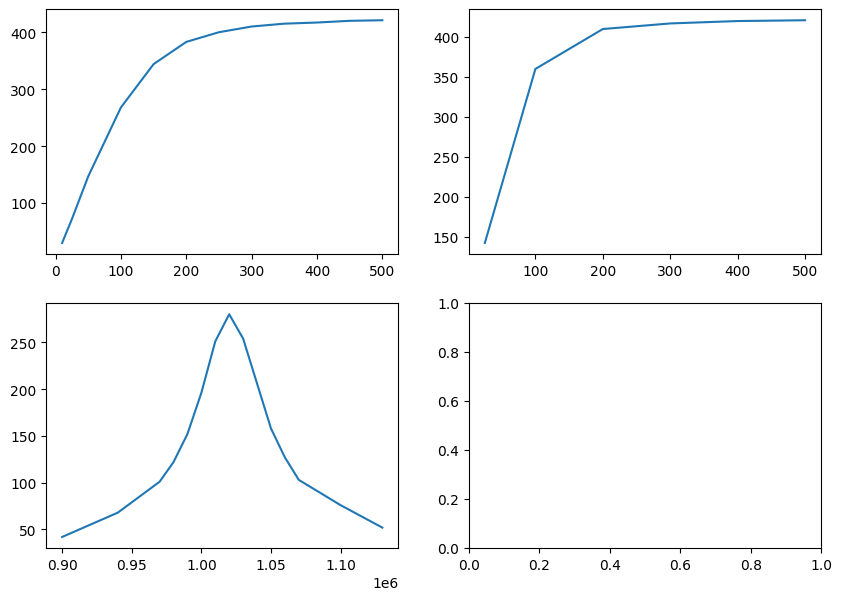

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#3 Амплитудная хар-ка на резонансе
df3 = pd.DataFrame()
df3['Um_in'] = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 25]
df3['2Um_out'] = [30, 147, 268, 344, 383, 400, 410, 415, 417, 420, 421, 72]

#4 Резонансный
df4 = pd.DataFrame()
df4['1'] = [25, 100, 200, 300, 400, 500]
df4['2'] = [142, 360, 410, 417, 420, 421]

#5 Um_in = 60mV
df5 = pd.DataFrame()
df5['f'] = [1.02, 1.03, 1.05, 1.07, 1.10, 1.13, 1.04, 1.01, 1.00, 0.99, 0.98, 0.97, 1.06, 0.94, 0.90]
df5 *= 1000000
df5['2Uout'] = [280, 254, 158, 103, 76, 52, 206, 251, 196, 152, 122, 101, 127, 68, 42]

df3 = df3.sort_values('Um_in')
df4 = df4.sort_values('1')
df5 = df5.sort_values('f')


fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0][0].plot(df3['Um_in'], df3['2Um_out'])
axs[0][1].plot(df4['1'], df4['2'])
axs[1][0].plot(df5['f'], df5['2Uout'])


# 6.2